In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from PIL import Image
from IPython.display import display


# Logistic Regression


Sigmoid function 
$$f(x) = \frac{1}{1 + e^{-(x)}}$$

# Maximum Likelihood

The likelihood function quantifies the probability of observing the given data under a specific statistical model and given parameters. Likelihood function is defined as the product of the individual probalities of each data point given the parameters. 

$$L(\beta) = \prod p(x_{i})^{y_{i}} \times (1-p(x_{i})^{1-y_{i}} )$$ 

where

$x_{i}$ is the data point

$y_{i}$ is the class being 1

Considering the values of probability is very dense that lies between 0 and 1 doing a product would not be mathematical easier and feasible to do. However, taking the logarithm allows transforming the product of probabilities in the likelihood function into a sum of logarithms, which is generally easier to work with and we called this Log Likelihood.

Log Likelihood function 
$$l(\beta) = \sum \limits _{i=1} ^{n} y_{i}log(p(x_{i})) + (1-y_{i})log(1-p(x_{i}))$$


Taking the logarithmic of probabilities value which lies between 0 and 1 will always return negative values. So, in order to have positive values we multiply it with -1 and by doing so we get the negative log-likelihood (which is the cost function). Under this, we try to minimize this negative log-likelihood and in return expects the best parameter values. 

# Cost function / cross-entropy function
Cost function is the optimisation objective.  

Hypothesis function
$$h\theta(X) = \frac{1}{1+e^{-(\beta_{0} + \beta_{1}X)}}$$

Cost function for binary classification

For y = 1; 
$$cost(h_{\theta}(x_{i}),y_{i}) = -log(h_{\theta}(x_{i}))))$$
For y = 0 
$$cost(h_{\theta}(x_{i}),y_{i}) = -log(1- h_{\theta}(x_{i}))))$$


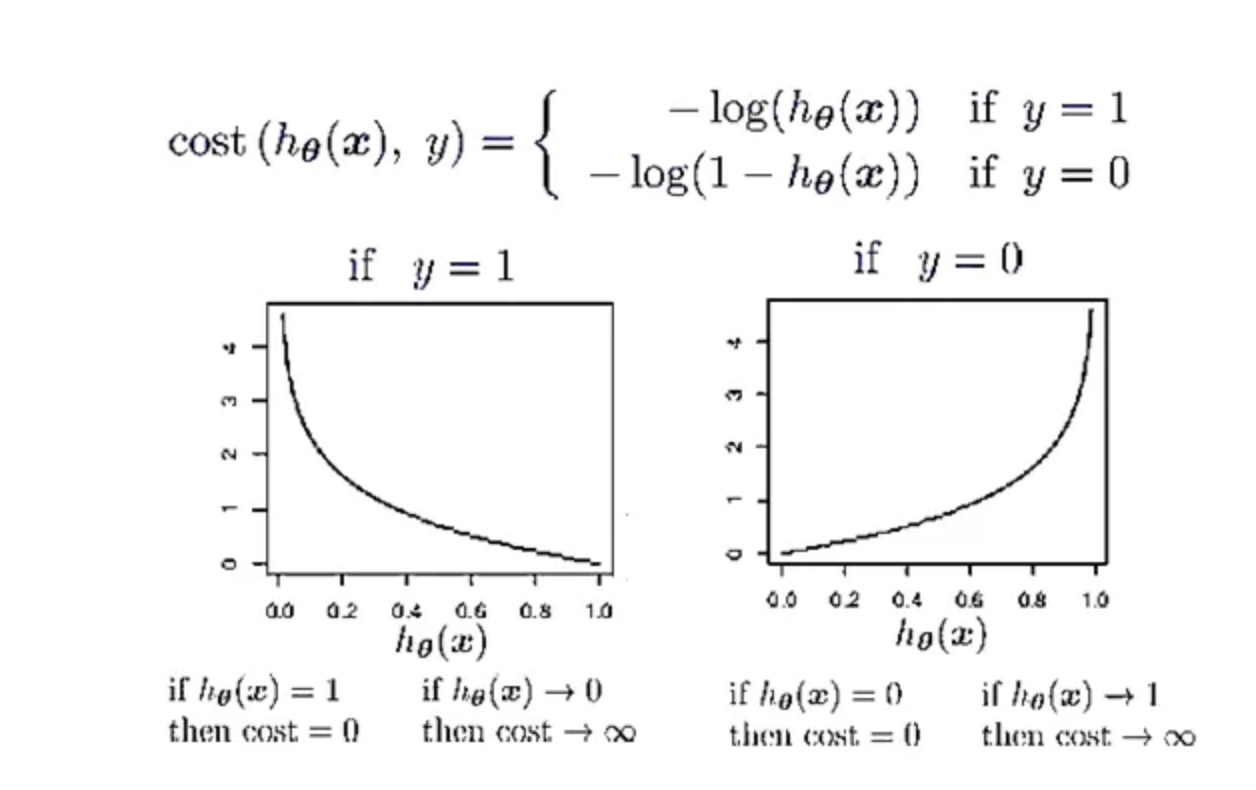

In [4]:
# https://en.wikipedia.org/wiki/Support_vector_machine#

img = Image.open('../images/LR_cost_function.jpg')
display(img)


The above two functions can be combined into a single function
$$J(\theta) = -\frac{1}{m}\sum[y^{(i)}log(h\theta(x^{(i)})) + (1-y^{(i)})log(1-h\theta(x^{(i)}))]$$

where 

m: the number of observations

x: features

$\theta$: parameters to be estimated

# Gradient descent

The goal of gradient descent is the mininise the cost value, min J($\theta$) by solving the differential equation above. This is the partial derivative of the cost function with respect to the parameter theta, indicating how the cost changes concerning changes in the parameter.
$$\frac{\partial}{\partial\theta}J(\theta) = \frac{1}{m}\sum(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}$$

How to get the derivative (gradients) of cost function with respect to the parameter for logistic regression: 
https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d#:~:text=Since%20the%20hypothesis%20function%20for,function%20follows%20a%20certain%20pattern.

To minimise out cost function we need to run the gradient descent function on each parameter: 
$$\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial\theta_{j}}J(\theta)$$

$$\theta_{j} := \theta_{j} - \alpha (\frac{1}{m} \sum \limits_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)})$$

# Regularisation

The purpose of regularisation is to overcome the overfitting issue. There are different regularisation techniques by modifying the loss function with a penalty term which effectively shrinks the estimates of the coefficients. Therefore these types of methods within the framework of regression are also called “shrinkage” methods or “penalized regression” methods. L1 and L2 are by adding the following term to the loss function to penalise the coefficients (not the bias) which are also called "Lasso" and "Ridge" regression respecively. L2 is calculated as the square root of the sum of the squared vector values whereas L1 uses the absolute values instead of squared values. This term will help shrink the coefficients in the regression towards zero. Elastic net combines L1 and L2 with an additional weight parameter. 

L2 Ridge (Hoerl and Kennard 1970)
$$J(\theta) = -\frac{1}{m}\sum[y^{(i)}log(h\theta(x(i))) + (1-y^{(i)}log(1-h\theta(x(i)))) + \frac{\lambda}{m}\sum \limits _{j=1} ^{D}\theta_{j}^{2}$$  

L1 Lasso (Tibshirani 1996)

$$J(\theta) = -\frac{1}{m}\sum[y^{(i)}log(h\theta(x(i))) + (1-y^{(i)}log(1-h\theta(x(i)))) + \frac{\lambda}{m}\sum \limits _{j=1} ^{D}|\theta_{j}|$$  

Elastic Net(Zou and Hastie 2005) 

$$J(\theta) = -\frac{1}{m}\sum[y^{(i)}log(h\theta(x(i))) + (1-y^{(i)}log(1-h\theta(x(i)))) + \frac{\lambda}{m}\sum \limits _{j=1} ^{D}(\alpha\theta^2 + (1-\alpha)|\theta_{j}|$$  


where 

D is the dimension of the features

$\lambda$ is the strength of the regularisation

j is the number of parameters in the model

$\alpha$ controls the weight given to L1 and L2 penalty and it's between 0 and 1

# Local minimum

Convexity of a function requires that the function has a unique global minimum and that any local minimum is also a global minimum. The negative log-likelihood function in logistic regression is convex. For parameter optimisation iterative optimization algorithms like gradient descent is used but it's not guaranteed that the found solution is a glocal minimum. In more complex models, such as deep neural networks with multiple layers and non-linear activations, the NLL cost function can become non-convex. 



# Collinearity, overfitting

Multicollinearity (when there are more than two independent variables involved) exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. 

Multicollinearity is a problem because it undermines the statistical significance of an independent variable. Common misconception is that it actually doesn't impact model performance. It just likely cause model overfitting. 

Overfitting a model is a condition where a statistical model begins to describe the random error in the data rather than the relationships between variables. This problem occurs when the model is too complex. In regression analysis, overfitting can produce misleading R-squared values, regression coefficients, and p-values


Multicollinearity is a problem in regression analysis and other statistical modeling techniques because it can:

- Impede Variable Interpretation: Multicollinearity makes it challenging to interpret the individual contribution of each predictor variable to the dependent variable. The coefficients may become unstable and sensitive to small changes in the data, leading to difficulties in assigning specific effects to each variable.
- Increase Standard Errors: Multicollinearity tends to inflate the standard errors of the regression coefficients. Larger standard errors imply that the estimated coefficients are less precise, reducing the reliability of statistical inferences and hypothesis tests.
- Lower Statistical Power: The increased standard errors resulting from multicollinearity reduce the statistical power of the regression analysis. This means that it becomes harder to detect true effects or relationships between predictor variables and the dependent variable.
- Influence Variable Selection: In the presence of multicollinearity, variable selection methods may become unreliable. Variables that are actually important for predicting the dependent variable may be wrongly excluded, or variables with less importance may be included, leading to suboptimal models.
- Model Instability:Small changes in the data, such as adding or removing observations, can result in significant changes in the estimated coefficients. This makes the model unstable and less robust.
- Misleading Correlations: Multicollinearity can lead to misleading correlations between predictor variables. The high correlation between variables may give the appearance of strong relationships, even though the relationship with the dependent variable may be weak.
- Increased Type II Errors: Multicollinearity can lead to increased Type II errors, where the model fails to detect a true effect or relationship that exists in the population.
 
To address multicollinearity, researchers may consider:
- Removing Redundant Variables: Identify and remove variables that are highly correlated with each other.
- Feature Engineering: Create new, independent variables that are not highly correlated with existing ones.
- Regularization Techniques: Use regularization methods, such as Ridge or Lasso regression, which can help mitigate multicollinearity by penalizing large coefficients.

